In [49]:
# Classic Imports
import pandas as pd
import re
import copy
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# Getting all the Datasets
before = pd.read_csv('CSV\BeforeRedData.csv')
after = pd.read_csv('CSV\AfterRedData.csv')

In [51]:
def rangeTwo(x, y):
    Final = []
    while x < y:
        Final.append(x)
        x = x + 1
    return Final

def createList(dataset):
    reform_list = []
    for reform in dataset.index:
        place_holder_list = [0, 0, 0, 0, 0, 0, 0, 0]
        for holder in rangeTwo(0, (len(dataset.columns) - 1)):
            column_name = 'M' + str(holder)
            holder_in = dataset.loc[reform, column_name]
            if holder_in == 1:
                place_holder_list[0] = place_holder_list[0] + 1
            elif holder_in == 2:
                place_holder_list[1] = place_holder_list[1] + 1
            elif holder_in == 3:
                place_holder_list[2] = place_holder_list[2] + 1
            elif holder_in == 4:
                place_holder_list[3] = place_holder_list[3] + 1
            elif holder_in == -1:
                place_holder_list[4] = place_holder_list[4] + 1
            elif holder_in == -2:
                place_holder_list[5] = place_holder_list[5] + 1
            elif holder_in == -3:
                place_holder_list[6] = place_holder_list[6] + 1
            elif holder_in == -4:
                place_holder_list[7] = place_holder_list[7] + 1
        reform_list.append(place_holder_list)
        
    return reform_list

test_input = createList(before)
test_output = createList(after)

In [52]:
before_test = pd.DataFrame(test_input, columns=['Goal_Home', 'Yellow_Home', 'Red_Card_Home', 'Own_Home', 'Goal_Away', 'Yellow_Away', 'Red_Card_Away', 'Own_Away'])
after_test = pd.DataFrame(test_output, columns=['Goal_Home', 'Yellow_Home', 'Red_Card_Home', 'Own_Home', 'Goal_Away', 'Yellow_Away', 'Red_Card_Away', 'Own_Away'])

In [53]:
before_test

,Goal_Home,Yellow_Home,Red_Card_Home,Own_Home,Goal_Away,Yellow_Away,Red_Card_Away,Own_Away
0,2,0,1,0,1,0,0,0
1,0,0,0,0,0,1,1,0
2,1,0,0,0,0,1,1,0
3,1,0,0,0,1,0,1,0
4,0,0,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...
3561,0,0,0,0,1,1,1,0
3562,3,0,0,0,1,2,1,0
3563,1,0,0,0,0,0,1,0
3564,0,0,0,0,0,0,1,0


In [114]:
after_test_plus = after_test.copy()
range_test = ['Goal_Home', 'Yellow_Home', 'Own_Home', 'Goal_Away', 'Yellow_Away', 'Own_Away']
for equal in after_test_plus.index:
    for equal_test in range_test:
        after_test_plus.loc[equal, equal_test] = after_test_plus.loc[equal, equal_test] + before_test.loc[equal, equal_test]

In [115]:
after_test_plus

,Goal_Home,Yellow_Home,Red_Card_Home,Own_Home,Goal_Away,Yellow_Away,Red_Card_Away,Own_Away
0,2,0,1,0,4,1,0,0
1,0,2,0,0,1,1,1,0
2,3,1,0,0,0,3,1,0
3,2,1,0,0,1,0,1,0
4,1,2,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...
3561,2,0,0,0,1,3,1,0
3562,5,2,0,0,1,3,1,0
3563,2,2,0,0,0,1,1,0
3564,1,1,0,0,0,0,1,0


In [121]:
x = before_test.iloc[:, range(0, 8)].values
y = after_test_plus.iloc[:, 0].values

In [122]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 30)

In [123]:
from sklearn.svm import SVC
classifier_svm = SVC(kernel = 'rbf', random_state = 0)
classifier_svm.fit(x_train, y_train)

SVC(random_state=0)

In [124]:
y_pred_svm = classifier_svm.predict(x_test)

In [125]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm_svm = confusion_matrix(y_test, y_pred_svm)
print(cm_svm)
accuracy_score(y_test,y_pred_svm)

[[271  13   0   0   0   0   0   0]
 [ 99 265   0   0   0   0   0   0]
 [ 28 110 101   0   0   0   0   0]
 [ 14  28  33  31   0   0   0   0]
 [  3  13   6  18  11   0   0   0]
 [  0   2   4   4   6   6   0   0]
 [  0   0   1   0   1   1   0   0]
 [  0   1   0   0   0   0   0   0]]


0.6401869158878505

In [126]:
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors=33)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=33)

In [127]:
y_pred_knn = classifier_knn.predict(x_test)

In [128]:
print(y_pred_knn)

[1 0 1 ... 2 1 1]


In [129]:
from sklearn.metrics import classification_report
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

[[240  40   4   0   0   0   0   0]
 [ 86 263  15   0   0   0   0   0]
 [ 25 102 106   6   0   0   0   0]
 [ 12  27  48  17   2   0   0   0]
 [  3  12  12  17   7   0   0   0]
 [  0   1   6   7   7   1   0   0]
 [  0   0   1   2   0   0   0   0]
 [  0   1   0   0   0   0   0   0]]
              precision    recall  f1-score   support

           0       0.66      0.85      0.74       284
           1       0.59      0.72      0.65       364
           2       0.55      0.44      0.49       239
           3       0.35      0.16      0.22       106
           4       0.44      0.14      0.21        51
           5       1.00      0.05      0.09        22
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         1

    accuracy                           0.59      1070
   macro avg       0.45      0.29      0.30      1070
weighted avg       0.57      0.59      0.56      1070



C:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\micha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [130]:
error = []
for i in range(1, 100):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

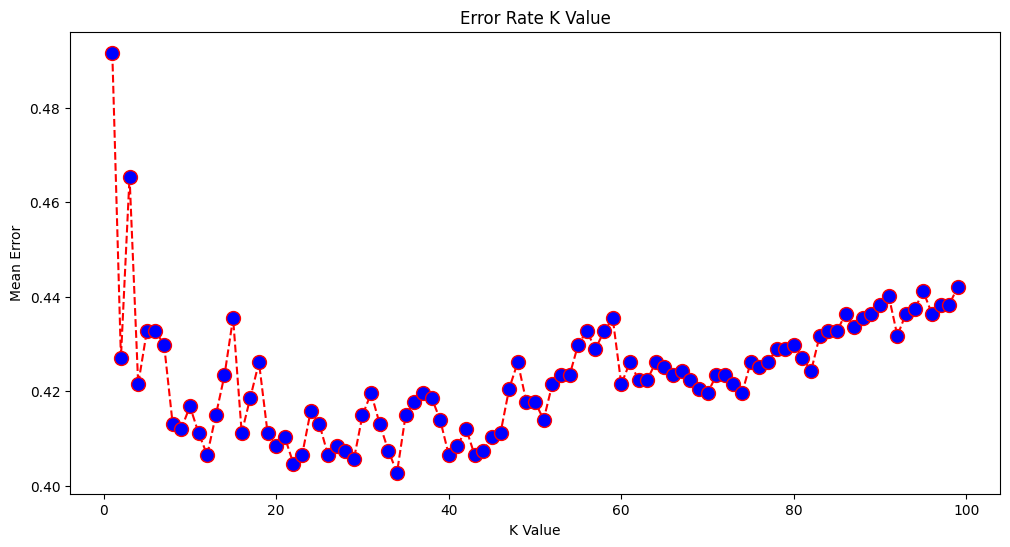

In [131]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 100), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')